# Numerically calculate simple cyclotron motion 

In [1]:
import numpy as np
from scipy.integrate import ode, odeint
import matplotlib.pyplot as plt

In [2]:
m_e = 9.11E-31 # kg
q_e = -1.6E-19 # C
R_e = 6371E3 # m

## Cyclotron motion in the equatorial magnetosphere

In [3]:
L = 5
B = 3.12E-5*(1/L)**3  # T

In [19]:
def f(X, t, q, m, B):
    """
    Calculate the derivatives of the position and velocity.

    X = [x, v_x, y, v_y]
    """
    w_c = np.sqrt(np.abs(q*B/m))
    ode_matrix = np.array([
            [0, 1, 0, 0],
            [0, 0, 0, w_c**2],
            [0, 0, 0, 1],
            [0, -w_c**2, 0, 0]
        ])
    return np.matmul(ode_matrix, X)

In [40]:
X0 = (0, 1E7, 0, 0)  # x, v_x, y, v_y
args = (q_e, m_e, B)  # q, m , B
w_c = np.sqrt(np.abs(q_e*B/m_e))
t = np.linspace(0, 1/w_c, num=5000)
solution = odeint(f, X0, t, args=args)

In [41]:
w_c

209.3741654635465

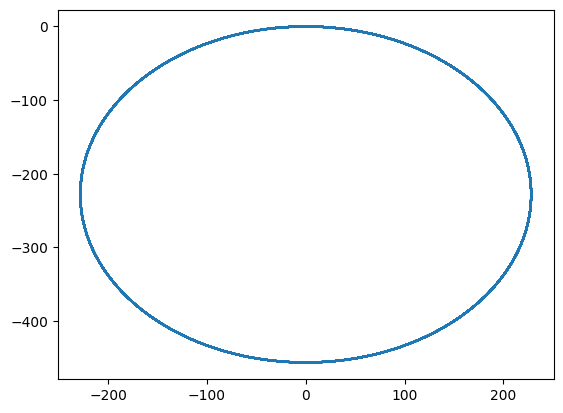

In [42]:
plt.plot(solution[:, 0], solution[:, 2])